In [1]:
from bdd import ConnexionMongoDB
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
conn = ConnexionMongoDB()
data = conn.userTweets(10000)


In [3]:
data.head(5)

,nbtweet,ftweets,agressivity,visibility,avgUrls,ratio,avgMention,avgHashtag
0,66656,0.119512,0.000512,0.068571,0.5,35.316995,0.666667,1.0
1,12159,-1.000000,0.000538,0.040714,0.0,3.251309,1.000000,0.0
2,29724,-1.000000,0.000538,0.000000,1.0,9.445135,0.000000,0.0
3,13879,-1.000000,0.000538,0.041429,0.0,19.555050,0.000000,1.0
4,11717,-1.000000,0.000538,0.165000,0.0,4.709850,1.000000,3.0


array([[<Axes: xlabel='nbtweet', ylabel='nbtweet'>,
        <Axes: xlabel='ftweets', ylabel='nbtweet'>,
        <Axes: xlabel='agressivity', ylabel='nbtweet'>,
        <Axes: xlabel='visibility', ylabel='nbtweet'>,
        <Axes: xlabel='avgUrls', ylabel='nbtweet'>,
        <Axes: xlabel='ratio', ylabel='nbtweet'>,
        <Axes: xlabel='avgMention', ylabel='nbtweet'>,
        <Axes: xlabel='avgHashtag', ylabel='nbtweet'>],
       [<Axes: xlabel='nbtweet', ylabel='ftweets'>,
        <Axes: xlabel='ftweets', ylabel='ftweets'>,
        <Axes: xlabel='agressivity', ylabel='ftweets'>,
        <Axes: xlabel='visibility', ylabel='ftweets'>,
        <Axes: xlabel='avgUrls', ylabel='ftweets'>,
        <Axes: xlabel='ratio', ylabel='ftweets'>,
        <Axes: xlabel='avgMention', ylabel='ftweets'>,
        <Axes: xlabel='avgHashtag', ylabel='ftweets'>],
       [<Axes: xlabel='nbtweet', ylabel='agressivity'>,
        <Axes: xlabel='ftweets', ylabel='agressivity'>,
        <Axes: xlabel='agressivi

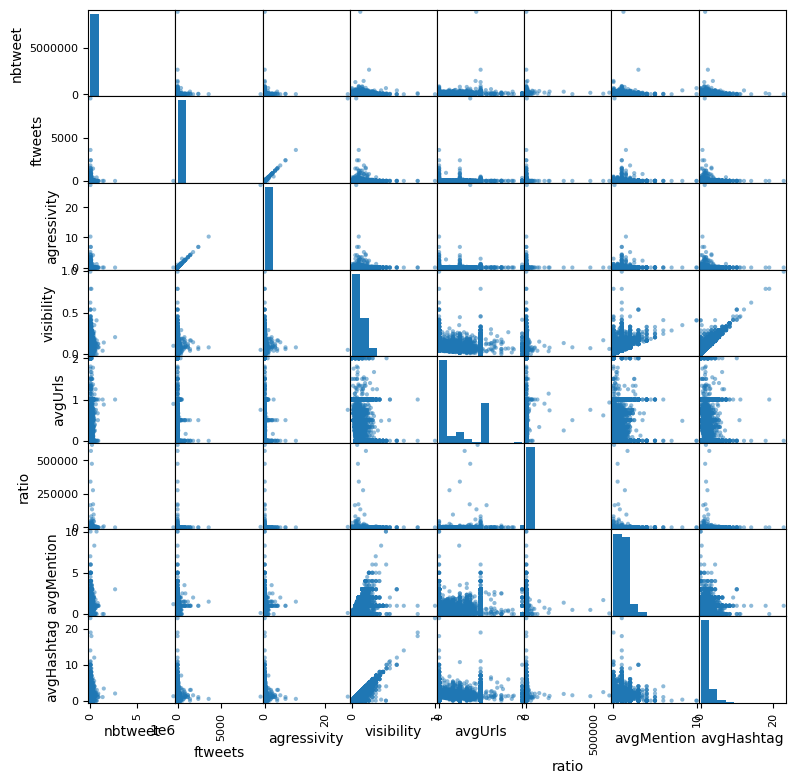

In [4]:
scatter_matrix(data, figsize=(9,9))

In [5]:
# Centrer et réduire les données
data_cr = StandardScaler().fit_transform(data.values)

# ACP
acp = PCA()
coord = acp.fit_transform(data_cr)
print(coord)

# Nombre de composantes calculées
n = acp.n_components_
print(f'Nombre de composantes : {n}')

[[-5.90926711e-01 -6.28722326e-02  2.41119292e-01 ...  5.69396663e-02
   5.09042848e-03 -3.11788107e-16]
 [-9.35785857e-01 -3.53598031e-02 -1.81327612e-01 ... -5.35411538e-01
  -1.65295772e-03  5.33156127e-16]
 [-2.40306724e+00 -4.16889983e-02  8.53979637e-02 ...  6.43216420e-01
  -8.00968369e-04 -2.19553857e-17]
 ...
 [ 1.61275127e-01 -9.77123605e-02 -3.01944282e-01 ...  2.94080879e-01
   5.56371277e-03 -7.12643132e-16]
 [-2.77315532e-02 -1.03015479e-01 -8.67606376e-01 ... -8.57357666e-01
  -1.76914722e-03  3.67574101e-17]
 [ 7.82067721e-01 -8.66705943e-02 -3.65046314e-01 ... -3.43654409e-01
   4.65136450e-03 -3.19061005e-16]]
Nombre de composantes : 8


In [7]:
# On récupère les valeurs propres, les variances et les inerties
variance = acp.explained_variance_
print("Variance : ")
print(variance)

eigval = variance*(len(data_cr)-1)/len(data_cr)
print("\nValeurs propres : ")
print(eigval)

# On vérifie que la somme des valeurs propres est bien égale au nombre de variables
print(f'\nVérification : {np.sum(eigval, axis=0)}')

# Pourcentage d'inertie expliquée par chaque axe
np.set_printoptions(suppress=True)
print("\nPourcentage d'inertie expliquée par chaque axe : ")
print(acp.explained_variance_ratio_*100)
print(f'Total : {np.sum(acp.explained_variance_ratio_*100)}')

Variance : 
[2.08903499 1.99930056 1.06141967 1.00033349 0.94473117 0.90453368
 0.00144651 0.        ]

Valeurs propres : 
[2.08882609 1.99910063 1.06131353 1.00023345 0.9446367  0.90444323
 0.00144636 0.        ]

Vérification : 8.000000000000002

Pourcentage d'inertie expliquée par chaque axe : 
[26.11032614 24.98875793 13.26641913 12.50291815 11.80795872 11.30554037
  0.01807956  0.        ]
Total : 100.0


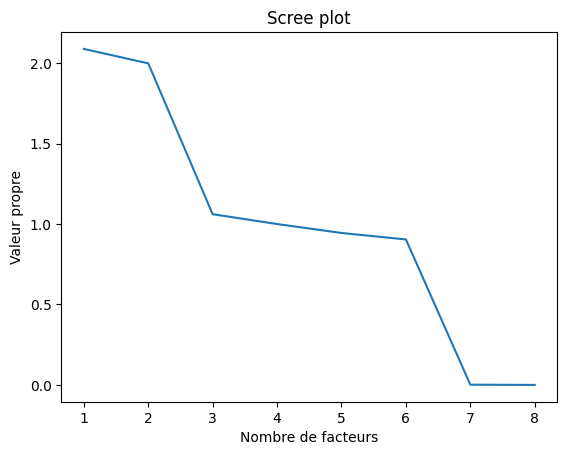

In [8]:
plt.figure(1)
plt.plot(np.arange(1, n+1), eigval)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Nombre de facteurs")
plt.show()

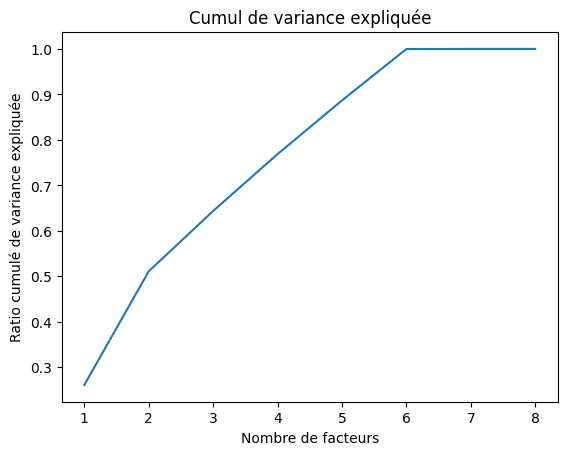

In [9]:
# Cumul de variance expliquée
plt.figure(2)
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumul de variance expliquée")
plt.ylabel("Ratio cumulé de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

In [10]:
vp_mat = acp.components_.T
sqrt_eigval = np.sqrt(eigval)

# Corrélation des variables avec les axes
corvar = np.zeros((8,8))
for k in range(8):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

print(pd.DataFrame({'id':data.columns, 'COR1':corvar[:,0], 'COR2':corvar[:,1]}))

            id      COR1      COR2
0      nbtweet  0.028363  0.002628
1      ftweets  0.023715  0.999213
2  agressivity  0.023392  0.999218
3   visibility  0.985161 -0.024463
4      avgUrls -0.360989 -0.002123
5        ratio -0.007500  0.001592
6   avgMention  0.509437  0.015513
7   avgHashtag  0.852335 -0.037193


<Figure size 640x480 with 0 Axes>

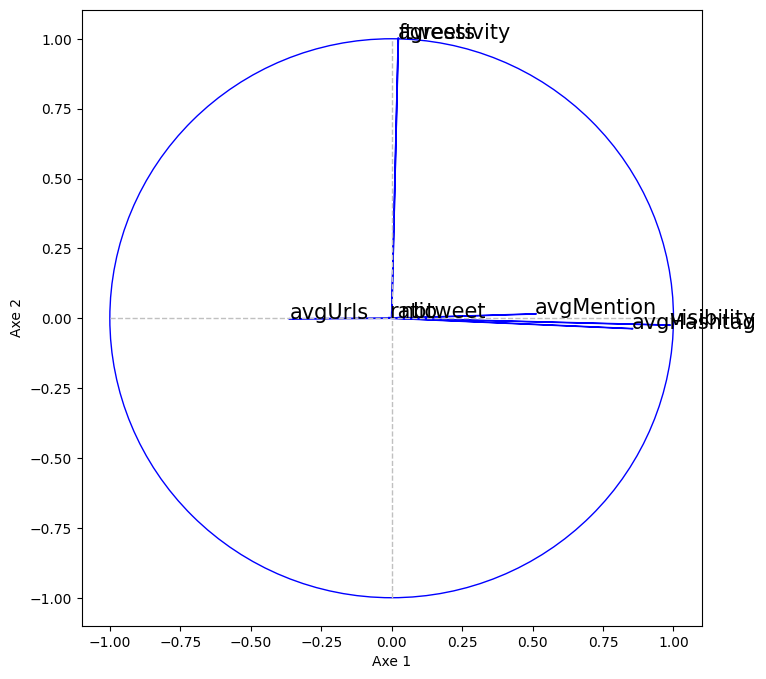

In [11]:
plt.figure(3)
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
#plt.scatter(corvar[:,0],corvar[:,1])

for i in range(0, acp.components_.shape[1]):
    axes.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i,0],
             corvar[i,1],  #1 for PC2  
             color='blue')

# affichage des étiquettes (noms des variables)
for j in range(8):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]), fontsize=15)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('Axe 1')
plt.ylabel('Axe 2')

#affichage
plt.show()

In [12]:
# Contributions des variables aux axes 
ctrvar = corvar**2
for j in range(8):
  ctrvar[:,j] = np.round(ctrvar[:,j]/eigval[j], 6)
pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

/var/folders/j1/pf2y6wvd0v76nhhjc3_vbw3w0000gp/T/ipykernel_67099/770852816.py:4: RuntimeWarning: invalid value encountered in divide
  ctrvar[:,j] = np.round(ctrvar[:,j]/eigval[j], 6)


,id,CTR_1,CTR_2
0,nbtweet,0.000385,0.000003
1,ftweets,0.000269,0.499438
2,agressivity,0.000262,0.499443
3,visibility,0.464635,0.000299
4,avgUrls,0.062386,0.000002
5,ratio,0.000027,0.000001
6,avgMention,0.124245,0.000120
7,avgHashtag,0.347791,0.000692


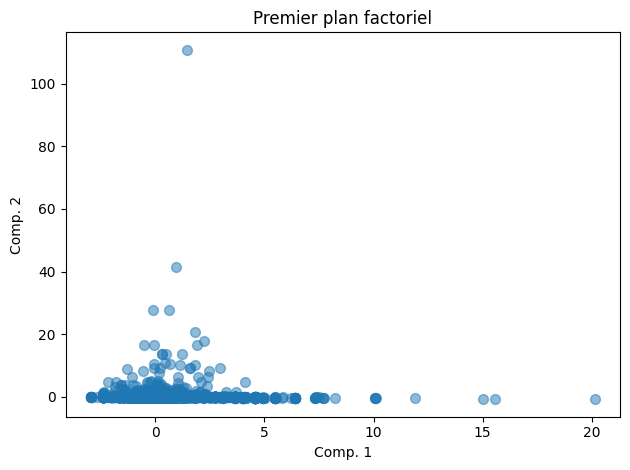

In [13]:
plt.figure(4)
plt.scatter(coord[:, 0], coord[:, 1], s=50, alpha=0.5)
plt.title('Premier plan factoriel')
plt.xlabel('Comp. 1')
plt.ylabel('Comp. 2')

plt.tight_layout()
plt.show() 

In [14]:
# 2ème plan factoriel
pd.DataFrame({'id':data.columns, 'COR3':corvar[:,2], 'COR4':corvar[:,3]})

,id,COR3,COR4
0,nbtweet,0.742984,-0.195936
1,ftweets,-0.005713,0.012350
2,agressivity,-0.006043,0.012339
3,visibility,0.040448,0.043557
4,avgUrls,0.290128,0.170565
5,ratio,0.539046,0.649968
6,avgMention,0.334938,-0.596617
7,avgHashtag,-0.143720,0.390048


<Figure size 640x480 with 0 Axes>

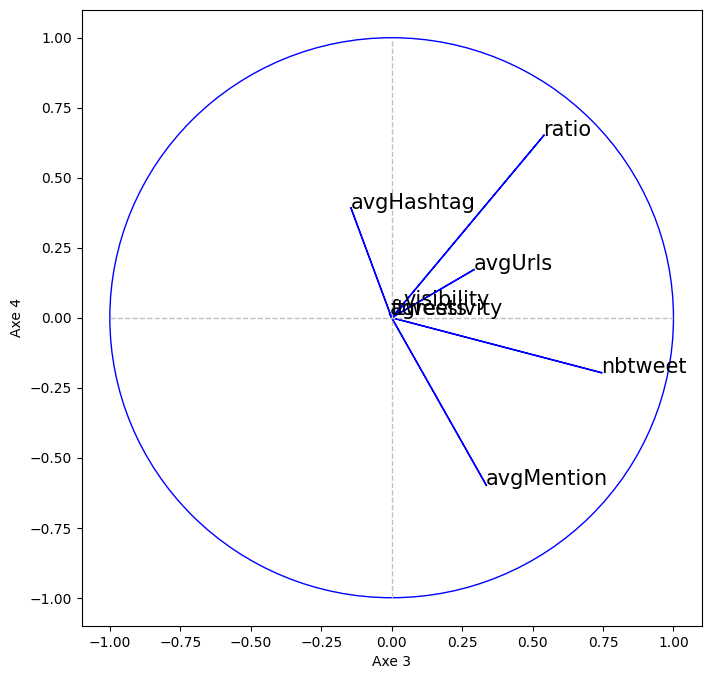

In [15]:
plt.figure(5)
# Cercle des corrélations pour les axes 3 et 4
fig, axes = plt.subplots(figsize=(8,8))

# les points
#plt.scatter(corvar[:,2],corvar[:,3])

for i in range(0, acp.components_.shape[1]):
    axes.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i,2],
             corvar[i,3],  #1 for PC2  
             color='blue')

# affichage des étiquettes (noms des variables)
for j in range(8):
     plt.annotate(data.columns[j],(corvar[j,2],corvar[j,3]), fontsize=15)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('Axe 3')
plt.ylabel('Axe 4')

#affichage
plt.show()

In [16]:
# Contributions des variables aux axes 3 et 4
pd.DataFrame({'id':data.columns,'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3]})

,id,CTR_3,CTR_4
0,nbtweet,0.520133,0.038382
1,ftweets,0.000031,0.000152
2,agressivity,0.000034,0.000152
3,visibility,0.001542,0.001897
4,avgUrls,0.079311,0.029086
5,ratio,0.273784,0.422360
6,avgMention,0.105702,0.355869
7,avgHashtag,0.019462,0.152102


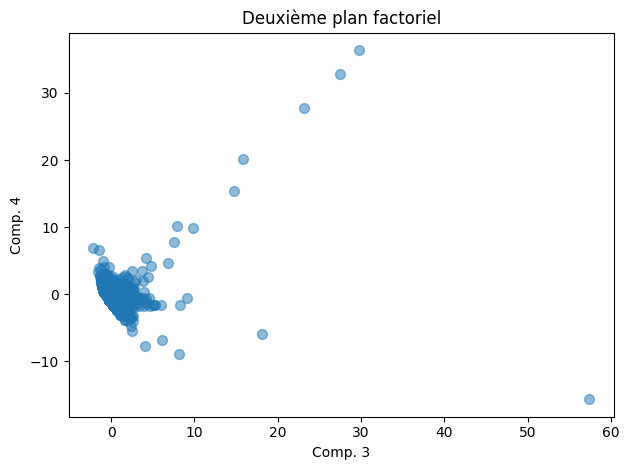

In [17]:
plt.figure(6)
plt.scatter(coord[:, 2], coord[:, 3], s=50, alpha=0.5)
plt.title('Deuxième plan factoriel')
plt.xlabel('Comp. 3')
plt.ylabel('Comp. 4')

plt.tight_layout()
plt.show() 